## Digital Consumer Behavior Analysis

#### NAMA : JESSICA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_excel('18221073.xlsx')
display(data.style.hide_index())

### Nomor 1

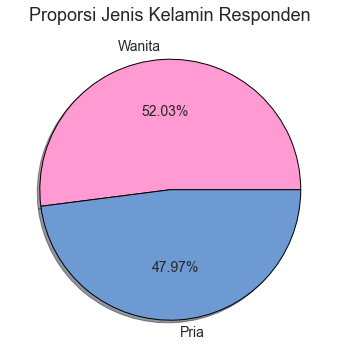

In [34]:
# SOAL
# Buat bar chart / pie chart / donut chart yang menunjukkan perbedaan frekuensi / proporsi jenis kelamin responden


# menghitung frekuensi jenis kelamin
groupby_gender = pd.DataFrame(data["Jenis Kelamin"].value_counts())

# membuat pie chart jenis kelamin
plt.figure(figsize=(6,6))
fig1 = plt.subplot()
fig1.pie(groupby_gender["Jenis Kelamin"], colors=["#FF9AD3","#6E9AD3"], labels=["Wanita","Pria"], shadow=True,
         wedgeprops={"linewidth":1,'edgecolor':'black'}, textprops={'fontsize': 14}, autopct='%1.2f%%')
sns.set(font_scale=1.2)
plt.title("Proporsi Jenis Kelamin Responden", size=18)
plt.show()

### Nomor 2

In [4]:
# Soal
# Buat tabel frekuensi dan proporsi untuk jenis kelamin responden


# menambahkan kolom proporsi jenis kelamin
groupby_gender.rename(columns={groupby_gender.columns[0]:"Frekuensi"}, inplace=True)
groupby_gender['Proporsi'] = groupby_gender['Frekuensi'] / groupby_gender['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi jenis kelamin
groupby_gender.rename_axis('Jenis Kelamin', axis="columns", inplace=True)
display(groupby_gender)

Jenis Kelamin  Frekuensi  Proporsi
Wanita               154   0.52027
Pria                 142   0.47973

### Nomor 3

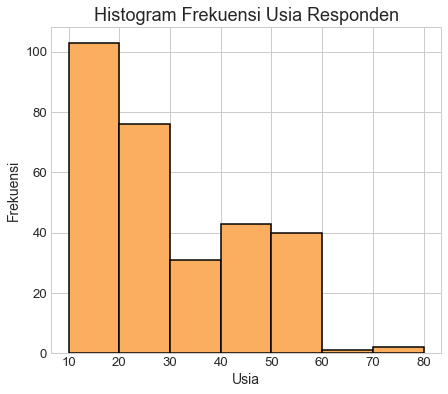

In [5]:
# SOAL
# Buat histogram untuk data umur responden


# mendapatkan data usia
age = data.iloc[:,1]

# membuat histogram usia
plt.figure(figsize=(7,6))
plt.style.use('seaborn-whitegrid')
plt.hist(age, bins=[10,20,30,40,50,60,70,80], color="#FCAE60", edgecolor='black', linewidth=1.5)
sns.set(font_scale=1.2)
plt.xlabel('Usia', size=14)
plt.ylabel('Frekuensi', size=14)
plt.title('Histogram Frekuensi Usia Responden', size=18)
plt.show()

### Nomor 4

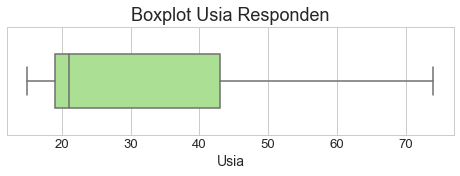

In [6]:
# SOAL
# Buat boxplot untuk data umur responden


# membuat boxplot usia
plt.figure(figsize=(8,2))
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=age, color="#A6EC86", width=0.5)
sns.set(font_scale=1.2)
plt.xlabel('Usia', size=14)
plt.title('Boxplot Usia Responden', size=18)
plt.show()

### Nomor 5

In [7]:
# SOAL
# Identifikasi nilai mean, Q1, Q2/median, Q3, min, max dari data umur responden


# menghitung mean usia responden
age_mean = np.mean(age)

# menghitung Q1 usia responden
age_Q1 = np.percentile(age, 25)

# menghitung Q2 / median usia responden
age_Q2 = np.median(age)

# menghitung Q3 usia responden
age_Q3 = np.percentile(age, 75)

# menghitung nilai min usia responden
age_min = np.min(age)

# menghitung nilai max usia responden
age_max = np.max(age)

# menggabungkan hasil perhitungan dalam tabel
data5 = np.array([age_mean,age_Q1,age_Q2,age_Q3,age_min,age_max])
row = ['Mean','Q1','Q2 / Median','Q3','Min','Max']
tabel5 = pd.DataFrame(data=data5, index=row, columns=['Usia'])

# menampilkan tabel
display(tabel5)

Usia
Mean         29.925676
Q1           19.000000
Q2 / Median  21.000000
Q3           43.000000
Min          15.000000
Max          74.000000

### Nomor 6

In [8]:
# SOAL
# Apakah terdapat outlier pada data umur responden 
# (Definisi outlier : < Q1 – 1.5 IQR atau > Q3 + 1.5 IQR; IQR = Q3 – Q1)


# menghitung IQR
age_IQR = age_Q3 - age_Q1

# menghitung batas bawah dan batas atas untuk menentukan outlier
age_LB = age_Q1 - 1.5*age_IQR
age_UB = age_Q3 + 1.5*age_IQR

# range outlier
print(f'Outlier : <{age_LB}, >{age_UB}')

# menampilkan outlier pada data usia responden
data6 = data.loc[(data["Usia"] < age_LB) | (data["Usia"] > age_UB)]
display(data6)

if(data6["Usia"].count() == 0) :
    print("\nTIDAK TERDAPAT OUTLIER PADA DATA USIA RESPONDEN")
else :
    print("\nTERDAPAT OUTLIER PADA DATA USIA RESPONDEN")

Outlier : <-17.0, >79.0


Empty DataFrame
Columns: [Jenis Kelamin, Usia, Pendidikan Terakhir, Pekerjaan, Penghasilan per Bulan, Domisili, Durasi Penggunaan Internet per Hari (dalam Jam), Aktivitas Online Meningkat, Aktivitas yang Meningkat dalam 3 Bulan Terakhir, layanan_aktif_1, layanan_aktif_2, layanan_aktif_3, layanan_aktif_4, layanan_aktif_5, layanan_aktif_6, bank_1, bank_2, bank_3, bank_4, bank_5, bank_6, bank_7, 18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM], 18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Internet Banking ], 18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ], 18. Bagaimana frekuensi penggunaan Channel Bank berikut? [SMS Banking], 18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Datang ke cabang bank], 19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Cek Saldo ], 19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Mutasi Rekening], 19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar rekening (sesama bank)], 19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank], 19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Pembelian Pulsa, eMoney atau voucher-voucher lain], 19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Pembayaran Tagihan], keluhan_1, keluhan_2, keluhan_3, keluhan_4, emoney_pilihan_1, emoney_pilihan_2, emoney_pilihan_3, emoney_pilihan_4, emoney_pilihan_5, emoney_pilihan_6, emoney_pilihan_7, emoney_pilihan_8, emoney_pilihan_9, emoney_pilihan_10, emoney_pilihan_11, alasan_pakai_emoney_1, alasan_pakai_emoney_2, alasan_pakai_emoney_3, alasan_pakai_emoney_4, alasan_pakai_emoney_5, penggunaan_emoney_1, penggunaan_emoney_2, penggunaan_emoney_3, penggunaan_emoney_4, penggunaan_emoney_5, penggunaan_emoney_6, penggunaan_emoney_7, penggunaan_emoney_8, penggunaan_emoney_9, penggunaan_emoney_10, cara_topup_emoney_1, cara_topup_emoney_2, cara_topup_emoney_3, cara_topup_emoney_4, cara_topup_emoney_5, cara_topup_emoney_6, cara_topup_emoney_7, 39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?, 40. Berapa frekuensi top up/ Isi ulang ?, keluhan_emoney_1, keluhan_emoney_2, keluhan_emoney_3, keluhan_emoney_4, penggunaan_qr_1, penggunaan_qr_2, penggunaan_qr_3, penggunaan_qr_4, lokasi_qr_1, lokasi_qr_2, lokasi_qr_3, lokasi_qr_4, lokasi_qr_5, lokasi_qr_6, 45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?, belanja_online_meningkat_6bln_terakhir_1, belanja_online_meningkat_6bln_terakhir_2, belanja_online_meningkat_6bln_terakhir_3, belanja_online_meningkat_6bln_terakhir_4, belanja_online_meningkat_6bln_terakhir_5, belanja_online_meningkat_6bln_terakhir_6, belanja_online_meningkat_6bln_terakhir_7, belanja_online_meningkat_6bln_terakhir_8, belanja_online_meningkat_6bln_terakhir_9, belanja_online_meningkat_6bln_terakhir_10, 47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [fashion & mode], 47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [groceries / keperluan sehari- hari], 47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone], ...]
Index: []

[0 rows x 150 columns]


TIDAK TERDAPAT OUTLIER PADA DATA USIA RESPONDEN


### Nomor 7

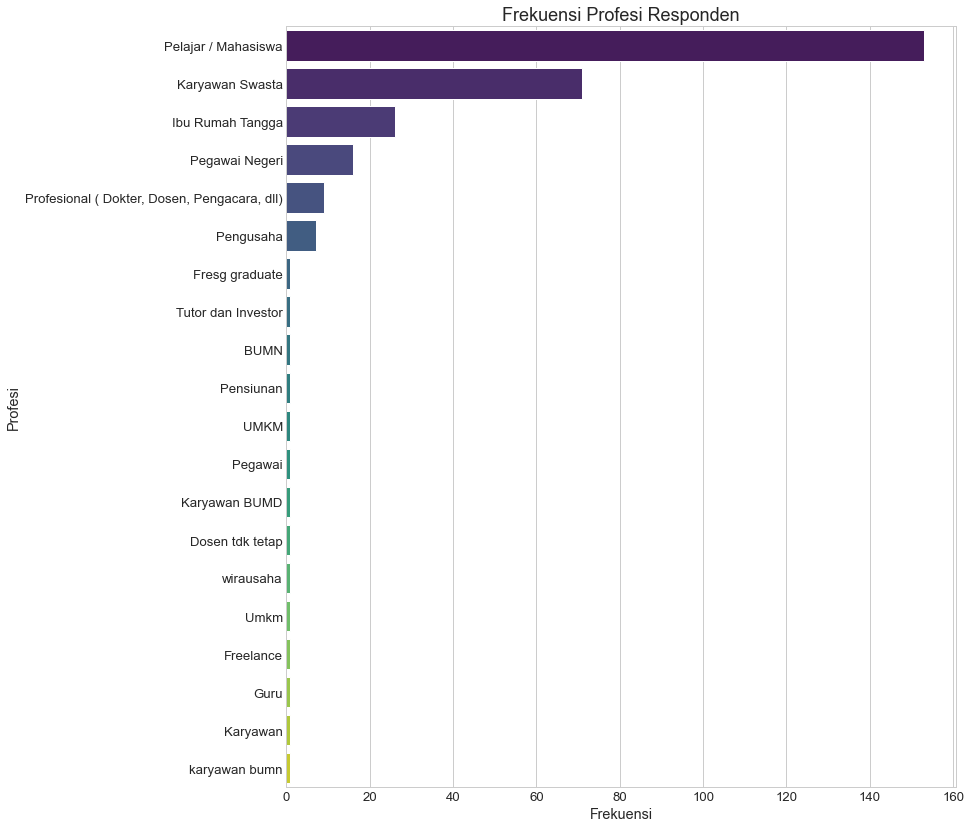

In [9]:
# SOAL
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi profesi responden

# menghitung frekuensi profesi
groupby_profesi = pd.DataFrame(data["Pekerjaan"].value_counts())
groupby_profesi.rename(columns={groupby_profesi.columns[0]:'Frekuensi'}, inplace=True)

# membuat bar chart profesi
plt.figure(figsize=(12,14))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=groupby_profesi, y=groupby_profesi.index, x='Frekuensi', palette="viridis")
sns.set(font_scale=1.2)
plt.title("Frekuensi Profesi Responden", size=18)
plt.ylabel('Profesi')
plt.show()

### Nomor 8

In [10]:
# SOAL
# Buat tabel frekuensi dan proporsi untuk profesi responden


# menambahkan kolom proporsi profesi
groupby_profesi['Proporsi'] = groupby_profesi['Frekuensi'] / groupby_profesi['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi profesi
groupby_profesi.rename_axis('Profesi', axis="columns", inplace=True)
display(groupby_profesi)

Profesi                                       Frekuensi  Proporsi
Pelajar / Mahasiswa                                 153  0.516892
Karyawan Swasta                                      71  0.239865
Ibu Rumah Tangga                                     26  0.087838
Pegawai Negeri                                       16  0.054054
Profesional ( Dokter, Dosen, Pengacara, dll)          9  0.030405
Pengusaha                                             7  0.023649
Fresg graduate                                        1  0.003378
Tutor dan Investor                                    1  0.003378
BUMN                                                  1  0.003378
Pensiunan                                             1  0.003378
UMKM                                                  1  0.003378
Pegawai                                               1  0.003378
Karyawan BUMD                                         1  0.003378
Dosen tdk tetap                                       1  0.003378
wirausaha                                             1  0.003378
Umkm                                                  1  0.003378
Freelance                                             1  0.003378
Guru                                                  1  0.003378
Karyawan                                              1  0.003378
karyawan bumn                                         1  0.003378

### Nomor 9

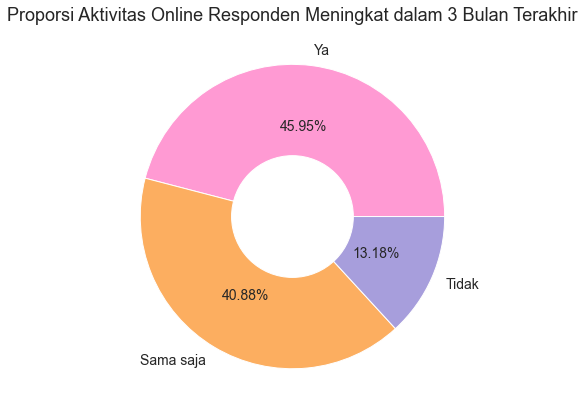

In [11]:
# SOAL
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk 
# apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir


# menghitung frekuensi aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir
groupby_onlineactivity = pd.DataFrame(data["Aktivitas Online Meningkat"].value_counts())

# membuat donut chart aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir
plt.figure(figsize=(7,7))
fig9 = plt.subplot()
fig9.pie(groupby_onlineactivity["Aktivitas Online Meningkat"], colors=["#FF9AD3","#FCAE60","#A79EDC"], 
         labels=["Ya","Sama saja","Tidak"], textprops={'fontsize': 14}, autopct='%1.2f%%')
sns.set(font_scale=1.2)
plt.title("Proporsi Aktivitas Online Responden Meningkat dalam 3 Bulan Terakhir", size=18)
circle = plt.Circle((0,0), 0.4, color="white")
graph = plt.gcf()
graph.gca().add_artist(circle)
plt.show()

### Nomor 10

In [12]:
# SOAL
# Buat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir


# menambahkan kolom proporsi aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir
groupby_onlineactivity.rename(columns={groupby_onlineactivity.columns[0]:'Frekuensi'}, inplace=True)
groupby_onlineactivity['Proporsi'] = groupby_onlineactivity['Frekuensi']/groupby_onlineactivity['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir
groupby_onlineactivity.rename_axis('Aktivitas Online Meningkat', axis="columns", inplace=True)
display(groupby_onlineactivity)

Aktivitas Online Meningkat  Frekuensi  Proporsi
Ya                                136  0.459459
Sama saja                         121  0.408784
Tidak                              39  0.131757

### Nomor 11

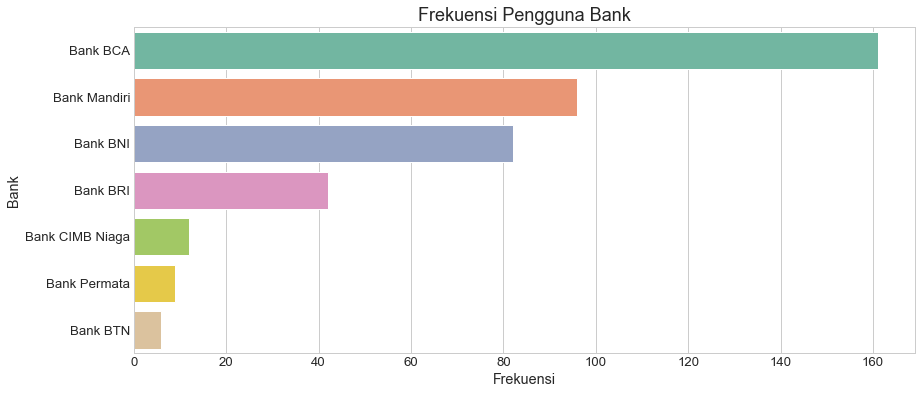

In [13]:
# SOAL
# Buat bar chart yang menunjukkan perbandingan frekuensi/proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7


# mendapatkan data kolom bank_1 sampai bank_7
bank = data.iloc[:,15:22]

# menggabungkan semua value data dalam sebuah list
data_bank = []
for col in bank.columns :
    data_bank += list(bank[col])

# menghitung frekuensi pengguna tiap bank
groupby_bank = pd.DataFrame(pd.Series(data_bank).value_counts(), columns=["Frekuensi"])

# membuat bar chart pengguna bank
plt.figure(figsize=(14,6))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=groupby_bank, y=groupby_bank.index, x='Frekuensi', palette="Set2")
sns.set(font_scale=1.2)
plt.title("Frekuensi Pengguna Bank", size=18)
plt.ylabel('Bank')
plt.show()

### Nomor 12

In [14]:
# SOAL
# Buat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7


# menambahkan kolom proporsi pengguna bank
groupby_bank['Proporsi'] = groupby_bank['Frekuensi'] / groupby_bank['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi pengguna bank
groupby_bank.rename_axis('Bank', axis="columns", inplace=True)
display(groupby_bank)

Bank             Frekuensi  Proporsi
Bank BCA               161  0.394608
Bank Mandiri            96  0.235294
Bank BNI                82  0.200980
Bank BRI                42  0.102941
Bank CIMB Niaga         12  0.029412
Bank Permata             9  0.022059
Bank BTN                 6  0.014706

### Nomor 13

In [15]:
# SOAL
# Hitung confidence interval untuk proporsi pengguna Bank BCA


alpha = 5/100
alpha_per_2 = alpha / 2
n = groupby_bank['Frekuensi'].sum()
pBCA = 161 / n
z_alpha_per_2 = st.norm.ppf(1 - alpha_per_2)
error = z_alpha_per_2 * ((pBCA*(1-pBCA)/n)**(1/2))
LB = pBCA - error
UB = pBCA + error

print("Confidence interval untuk proporsi pengguna Bank BCA :")
print(f"{LB:.5f} < proporsi pengguna Bank BCA < {UB:.5f}")

Confidence interval untuk proporsi pengguna Bank BCA :
0.34718 < proporsi pengguna Bank BCA < 0.44203


### Nomor 14

In [16]:
# SOAL
# Lakukan uji hipotesis berikut :
# H0 : pBCA = 0.5
# H1 : pBCA != 0.5
# alpha = 5%


alpha = 5/100
alpha_per_2 = alpha/2
p0 = 0.5
n = groupby_bank['Frekuensi'].sum()
pBCA = 161 / n
z_alpha_per_2 = st.norm.ppf(1 - alpha_per_2)
z = ((n*pBCA)-(n*p0)) / ((n*p0*(1-p0))**(1/2))

print(f"Critical region : z < -{z_alpha_per_2:.5f}, z > {z_alpha_per_2:.5f}\n")
print(f"z = {z:.5f}")
print("Kesimpulan : ", end="")
if ((z < -z_alpha_per_2) | (z > z_alpha_per_2)) :
    print("z di dalam critical region, H0 berhasil ditolak")
else :
    print("z di luar critical region, H0 gagal ditolak")

pvalue = 2*(1 - st.norm.cdf(abs(z)))
print(f"\np-value = {pvalue:.8f}")

Critical region : z < -1.95996, z > 1.95996

z = -4.25763
Kesimpulan : z di dalam critical region, H0 berhasil ditolak

p-value = 0.00002066


### Nomor 15

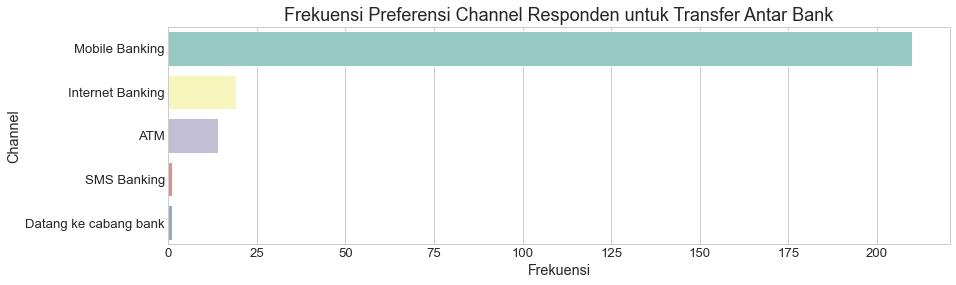

In [17]:
# SOAL
# Buat bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi channel yang dipilih responden 
# untuk melakukan “Transfer antar bank”.


# mendapatkan data preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”
data15 = data.iloc[:,30]

# menghitung frekuensi preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”
groupby_channel = pd.DataFrame(data15.value_counts())
groupby_channel.columns = ['Frekuensi']

# membuat bar chart preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”
plt.figure(figsize=(14,4))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=groupby_channel, y=groupby_channel.index, x='Frekuensi', palette="Set3")
sns.set(font_scale=1.2)
plt.title("Frekuensi Preferensi Channel Responden untuk Transfer Antar Bank", size=18)
plt.ylabel('Channel')
plt.show()

### Nomor 16

In [18]:
# SOAL
# Buat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”


# menambahkan kolom proporsi preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”
groupby_channel['Proporsi'] = groupby_channel['Frekuensi'] / groupby_channel['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”
groupby_channel.rename_axis('Channel untuk Transfer Antar Bank', axis="columns", inplace=True)
display(groupby_channel)

Channel untuk Transfer Antar Bank  Frekuensi  Proporsi
Mobile Banking                           210  0.857143
Internet Banking                          19  0.077551
ATM                                       14  0.057143
SMS Banking                                1  0.004082
Datang ke cabang bank                      1  0.004082

### Nomor 17

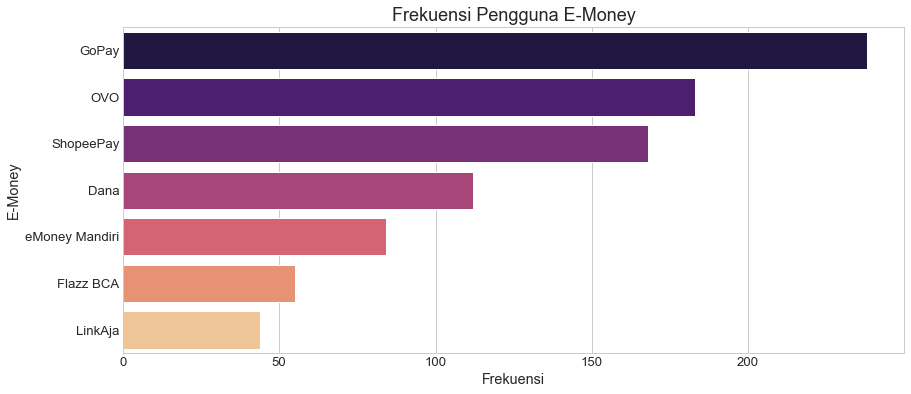

In [19]:
# SOAL
# Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai 
# emoney_pilihan_7 (8 – 11 tidak usah)


# mendapatkan data kolom emoney_pilihan_1 sampai emoney_pilihan_7
emoney = data.iloc[:,37:44]

# menggabungkan semua value data dalam sebuah list
data_emoney = []
for col in emoney.columns :
    data_emoney += list(emoney[col])

# menghitung frekuensi pengguna tiap emoney
groupby_emoney = pd.DataFrame(pd.Series(data_emoney).value_counts(), columns=["Frekuensi"])

# membuat bar chart pengguna emoney
plt.figure(figsize=(14,6))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=groupby_emoney, y=groupby_emoney.index, x='Frekuensi', palette="magma")
sns.set(font_scale=1.2)
plt.title("Frekuensi Pengguna E-Money", size=18)
plt.ylabel('E-Money')
plt.show()

### Nomor 18

In [20]:
# SOAL
# Buat tabel frekuensi dan proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai 
# emoney_pilihan_7 (8 – 11 tidak usah)


# menambahkan kolom proporsi pengguna emoney
groupby_emoney['Proporsi'] = groupby_emoney['Frekuensi'] / groupby_emoney['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi pengguna bank
groupby_emoney.rename_axis('E-Money', axis="columns", inplace=True)
display(groupby_emoney)

E-Money         Frekuensi  Proporsi
GoPay                 238  0.269231
OVO                   183  0.207014
ShopeePay             168  0.190045
Dana                  112  0.126697
eMoney Mandiri         84  0.095023
Flazz BCA              55  0.062217
LinkAja                44  0.049774

### Nomor 19

In [21]:
# SOAL
# Hitung confidence interval untuk selisih proporsi pengguna Gopay dan OVO


alpha = 5/100
alpha_per_2 = alpha / 2
nGopay = groupby_emoney['Frekuensi'].sum()
nOVO = groupby_emoney['Frekuensi'].sum()
pGopay = 238 / nGopay
pOVO = 183 / nOVO
selisih_p_Gopay_OVO = pGopay - pOVO
z_alpha_per_2 = st.norm.ppf(1 - alpha_per_2)
error = z_alpha_per_2 * (((pGopay*(1-pGopay)/nGopay)+(pOVO*(1-pOVO)/nOVO))**(1/2))
LB = selisih_p_Gopay_OVO - error
UB = selisih_p_Gopay_OVO + error

print("Confidence interval untuk selisih proporsi pengguna Gopay dan OVO :")
print(f"{LB:.5f} < selisih proporsi pengguna Gopay dan OVO < {UB:.5f}")

Confidence interval untuk selisih proporsi pengguna Gopay dan OVO :
0.02262 < selisih proporsi pengguna Gopay dan OVO < 0.10182


### Nomor 20

In [22]:
# SOAL
# Lakukan uji hipotesis berikut :
# H0 : pGopay = pOVO
# H1 : pGopay > pOVO
# alpha = 5%


alpha = 5/100
alpha_per_2 = alpha/2
nGopay = groupby_emoney['Frekuensi'].sum()
nOVO = groupby_emoney['Frekuensi'].sum()
xGopay = 238
xOVO = 183
pGopay = xGopay / nGopay
pOVO = xOVO / nOVO
phat = (xGopay+xOVO) / (nGopay+nOVO)
z_alpha = st.norm.ppf(1 - alpha)
z = (pGopay-pOVO) / ((phat*(1-phat)*((1/nGopay)+(1/nOVO)))**(1/2))

print(f"Critical region : z > {z_alpha:.5f}\n")
print(f"z = {z:.5f}")
print("Kesimpulan : ", end="")
if (z > z_alpha) :
    print("z di dalam critical region, H0 berhasil ditolak")
else :
    print("z di luar critical region, H0 gagal ditolak")

pvalue = 1 - st.norm.cdf(z)
print(f"\np-value = {pvalue:.8f}")

Critical region : z > 1.64485

z = 3.07099
Kesimpulan : z di dalam critical region, H0 berhasil ditolak

p-value = 0.00106674


### Nomor 21

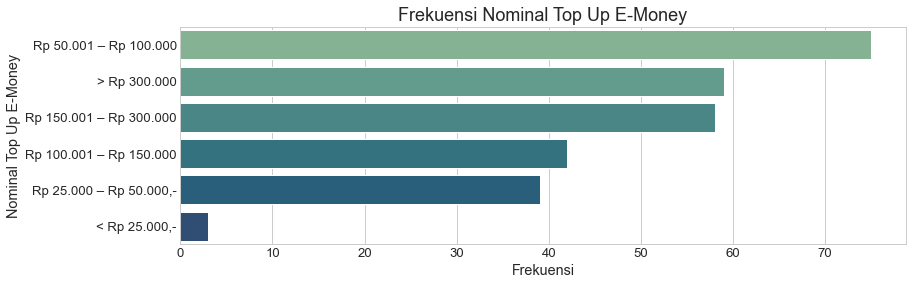

In [23]:
# SOAL
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk nominal 
# yang biasa dipakai untuk top up emoney


# mendapatkan data nominal top up emoney
data21 = data.iloc[:,70]

# menghitung frekuensi nominal top up money
groupby_topup = pd.DataFrame(data21.value_counts())
groupby_topup.columns = ['Frekuensi']

# membuat bar chart nominal top up emoney
plt.figure(figsize=(13,4))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=groupby_topup, y=groupby_topup.index, x='Frekuensi', palette="crest")
sns.set(font_scale=1.2)
plt.title("Frekuensi Nominal Top Up E-Money", size=18)
plt.ylabel('Nominal Top Up E-Money')
plt.show()

### Nomor 22

In [24]:
# SOAL
# Buat tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up emoney


# menambahkan kolom proporsi nominal top up emoney
groupby_topup['Proporsi'] = groupby_topup['Frekuensi']/groupby_topup['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi nominal top up emoney
groupby_topup.rename_axis('Nominal Top Up E-Money', axis="columns", inplace=True)
display(groupby_topup)

Nominal Top Up E-Money   Frekuensi  Proporsi
Rp 50.001 – Rp 100.000          75  0.271739
> Rp 300.000                    59  0.213768
Rp 150.001 – Rp 300.000         58  0.210145
Rp 100.001 – Rp 150.000         42  0.152174
Rp 25.000 – Rp 50.000,-         39  0.141304
< Rp 25.000,-                    3  0.010870

### Nomor 23

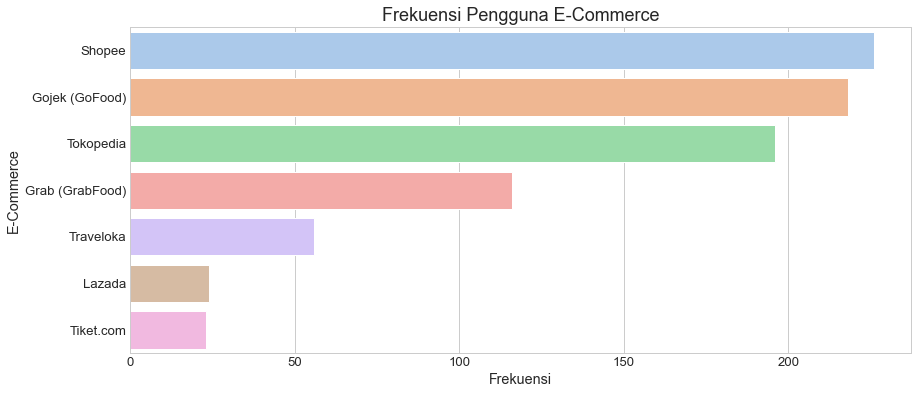

In [25]:
# SOAL
# Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1
# sampai ecommerce_pilihan_7 (8 – 12 tidak usah)


# mendapatkan data kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7
ecommerce = data.iloc[:,116:123]

# menggabungkan semua value data dalam sebuah list
data_ecommerce = []
for col in ecommerce.columns :
    data_ecommerce += list(ecommerce[col])

# menghitung frekuensi pengguna tiap ecommerce
groupby_ecommerce = pd.DataFrame(pd.Series(data_ecommerce).value_counts(), columns=["Frekuensi"])
groupby_ecommerce.rename(index={groupby_ecommerce.index[1]:'Gojek (GoFood)', groupby_ecommerce.index[3]:'Grab (GrabFood)'}, inplace=True)

# membuat bar chart pengguna ecommerce
plt.figure(figsize=(14,6))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=groupby_ecommerce, y=groupby_ecommerce.index, x='Frekuensi', palette="pastel")
sns.set(font_scale=1.2)
plt.title("Frekuensi Pengguna E-Commerce", size=18)
plt.ylabel('E-Commerce')
plt.show()

### Nomor 24

In [26]:
# SOAL
# Buat tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 
# sampai ecommerce_pilihan_7 (8 – 12 tidak usah)


# menambahkan kolom proporsi pengguna ecommerce
groupby_ecommerce['Proporsi'] = groupby_ecommerce['Frekuensi']/groupby_ecommerce['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi pengguna ecommerce
groupby_ecommerce.rename_axis('E-Commerce', axis="columns", inplace=True)
display(groupby_ecommerce)

E-Commerce       Frekuensi  Proporsi
Shopee                 226  0.263097
Gojek (GoFood)         218  0.253783
Tokopedia              196  0.228172
Grab (GrabFood)        116  0.135041
Traveloka               56  0.065192
Lazada                  24  0.027939
Tiket.com               23  0.026775

### Nomor 25

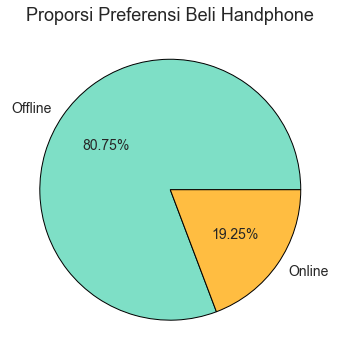

In [27]:
# SOAL
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi 
# untuk responden yang prefer beli handphone secara offline vs online


# mendapatkan data preferensi beli handphone secara offline vs online
data25 = data.iloc[:,99]

# menghitung frekuensi preferensi beli handphone secara offline vs online
groupby_handphone = pd.DataFrame(data25.value_counts())
groupby_handphone.columns = ['Frekuensi']
groupby_handphone.rename(index={groupby_handphone.index[0]:'Offline', groupby_handphone.index[1]:'Online'}, inplace=True)

# membuat pie chart preferensi beli handphone secara offline vs online
plt.figure(figsize=(6,6))
fig25 = plt.subplot()
fig25.pie(groupby_handphone['Frekuensi'], colors=["#7EDFC6","#FFBD41"], labels=["Offline","Online"], 
          wedgeprops={"linewidth":1,'edgecolor':'black'}, textprops={'fontsize': 14}, autopct='%1.2f%%')
sns.set(font_scale=1.2)
plt.title("Proporsi Preferensi Beli Handphone", size=18)
plt.show()

### Nomor 26

In [28]:
# SOAL
# Buat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara offline vs online


# menambahkan kolom proporsi preferensi beli handphone secara offline vs online
groupby_handphone['Proporsi'] = groupby_handphone['Frekuensi']/groupby_handphone['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi preferensi beli handphone secara offline vs online
groupby_handphone.rename_axis('Preferensi Beli Handphone', axis="columns", inplace=True)
display(groupby_handphone)

Preferensi Beli Handphone  Frekuensi  Proporsi
Offline                          214  0.807547
Online                            51  0.192453

### Nomor 27

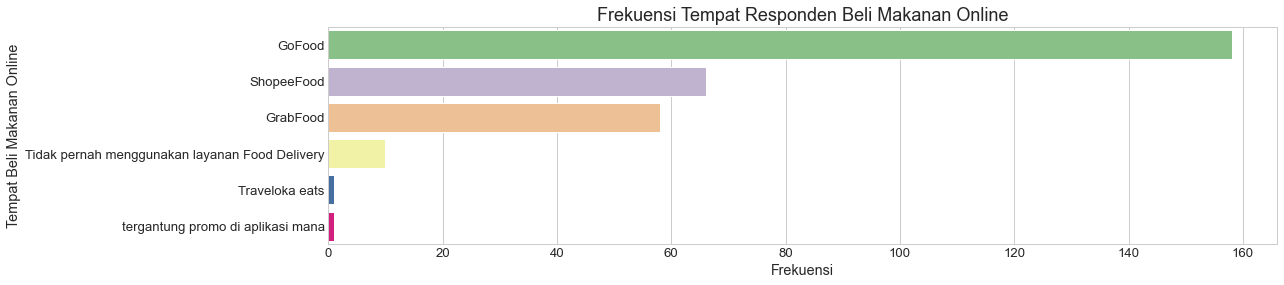

In [41]:
# SOAL
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi 
# untuk tempat beli makanan online yang pilihan responden


# mendapatkan data tempat beli makanan online
data27 = data.iloc[:,128]

# menghitung frekuensi tempat beli makanan online
groupby_food = pd.DataFrame(data27.value_counts())
groupby_food.columns = ['Frekuensi']

# membuat bar chart tempat beli makanan online
plt.figure(figsize=(17,4))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=groupby_food, y=groupby_food.index, x='Frekuensi', palette="Accent")
sns.set(font_scale=1.2)
plt.title("Frekuensi Tempat Responden Beli Makanan Online", size=18)
plt.ylabel('Tempat Beli Makanan Online')
plt.show()

### Nomor 28

In [30]:
# SOAL
# Buat tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan responden


# menambahkan kolom proporsi tempat beli makanan online
groupby_food['Proporsi'] = groupby_food['Frekuensi'] / groupby_food['Frekuensi'].sum()

# menampilkan tabel frekuensi dan proporsi tempat beli makanan online
groupby_food.rename_axis('Tempat Beli Makanan Online', axis="columns", inplace=True)
display(groupby_food)

Tempat Beli Makanan Online                      Frekuensi  Proporsi
GoFood                                                158  0.537415
ShopeeFood                                             66  0.224490
GrabFood                                               58  0.197279
Tidak pernah menggunakan layanan Food Delivery         10  0.034014
Traveloka eats                                          1  0.003401
tergantung promo di aplikasi mana                       1  0.003401

### Nomor 29

In [31]:
# SOAL
# Lakukan One Way ANOVA Test berikut :
# H0 : Mean umur pengguna gofood = mean umur pengguna grabfood = mean umur pengguna shopeefood
# H1 : Setidaknya ada dua grup yang memiliki mean umur yang berbeda
# alpha = 5%


# mendapatkan data usia dan layanan food delivery
data29 = pd.DataFrame(data.iloc[:,[1,128]])
data29.rename(columns={data29.columns[1]:'Layanan Food Delivery'}, inplace=True)

# memfilter data untuk mendapatkan pengguna GoFood, GrabFood, dan ShopeeFood
data29 = data29.loc[data29["Layanan Food Delivery"].isin(['GrabFood','GoFood','ShopeeFood'])]

# mengurutkan data berdasarkan layanan food delivery
data29 = data29.sort_values(by=["Layanan Food Delivery"])

# menghitung xbar GoFood
data_gofood = data29.loc[data29["Layanan Food Delivery"]=="GoFood"]
xbar_gofood = np.mean(data_gofood['Usia'])
xbar_gofood = [xbar_gofood for i in range(len(data_gofood))]
xbar_gofood = pd.DataFrame(xbar_gofood)

# menghitung xbar GrabFood
data_grabfood = data29.loc[data29["Layanan Food Delivery"]=="GrabFood"]
xbar_grabfood = np.mean(data_grabfood['Usia'])
xbar_grabfood = [xbar_grabfood for i in range(len(data_grabfood))]
xbar_grabfood = pd.DataFrame(xbar_grabfood)

# menghitung xbar ShopeeFood
data_shopeefood = data29.loc[data29["Layanan Food Delivery"]=="ShopeeFood"]
xbar_shopeefood = np.mean(data_shopeefood['Usia'])
xbar_shopeefood = [xbar_shopeefood for i in range(len(data_shopeefood))]
xbar_shopeefood = pd.DataFrame(xbar_shopeefood)

# menggabungkan xbar GoFood, GrabFood, dan ShopeeFood menjadi xbar per group
xbar_per_group = pd.concat([xbar_gofood,xbar_grabfood,xbar_shopeefood], axis=0)
xbar_per_group.columns = ['xbar per group']

# menghitung xbar all
xbar_all = np.mean(data29['Usia'])
xbar_all = [xbar_all for i in range(len(data29))]
xbar_all = pd.DataFrame(xbar_all, columns=['xbar all'])

# menggabungkan hasil
data29.reset_index(inplace=True, drop=True)
xbar_per_group.reset_index(inplace=True, drop=True)
result29 = pd.concat([data29,xbar_per_group,xbar_all], axis=1)

# menghitung (x - xbar per group)^2 dan (x - xbar all)^2
result29['(x - xbar per group)^2'] = (result29['Usia'] - result29['xbar per group'])**2
result29['(x - xbar all)^2'] = (result29['Usia'] - result29['xbar all'])**2

# menampilkan hasil
display(result29.style.hide_index())

In [32]:
# perhitungan tabel One Way ANOVA Test
alpha = 5/100
dfB = 2
dfT = len(data29) - 1
dfE = dfT - dfB
SSE = result29['(x - xbar per group)^2'].sum()
SST = result29['(x - xbar all)^2'].sum()
SSB = SST - SSE
MSB = SSB / dfB
MSE = SSE / dfE
f = MSB / MSE
f_alpha = st.f.ppf(1 - alpha, dfB, dfE)

print("Tabel One Way ANOVA Test")
tabel_anova = pd.DataFrame([[dfB,SSB,MSB,f],[dfE,SSE,MSE],[dfT,SST]], columns=['df','SS','MS','f']).fillna('')
display(tabel_anova.style.hide_index())

print(f"\nCritical region : f > {f_alpha:.5f}\n")
print(f"f = {f:.5f}")
print("Kesimpulan : ", end="")
if (f > f_alpha) :
    print("f di dalam critical region, H0 berhasil ditolak")
else :
    print("f di luar critical region, H0 gagal ditolak")

pvalue = 1 - st.f.cdf(f, dfB, dfE)
print(f"\np-value = {pvalue:.8f}")

Tabel One Way ANOVA Test



Critical region : f > 3.02813

f = 5.89484
Kesimpulan : f di dalam critical region, H0 berhasil ditolak

p-value = 0.00310826


### Nomor 30

Soal : Tuliskan minimal 5 insights/pelajaran dari hasil pengolahan data responden

1. Mayoritas responden merupakan pelajar / mahasiswa dan berusia sekitar 20 tahun
2. Aktivitas online dalam 3 bulan terakhir mengalami peningkatan
3. Jumlah pengguna Bank BCA lebih banyak dibandingkan dengan bank-bank lainnya
4. Mayoritas responden memilih untuk menggunakan mobile banking dalam melakukan transfer antar bank
5. E-money dengan jumlah pengguna paling banyak adalah GoPay, disusul oleh OVO dan ShopeePay secara berurutan
6. Mayoritas responden melakukan top up e-money dengan nominal sebesar Rp 50.000 - Rp 100.000
7. E-commerce yang paling banyak digunakan adalah Shopee, disusul oleh Gojek (GoFood) dan Tokopedia secara berurutan
8. Mayoritas responden umumnya lebih memilih untuk melakukan pembelian handphone secara offline atau langsung datang ke toko
9. Layanan food delivery yang paling banyak digunakan adalah GoFood